/Users/hello./RAGChatbot-and-Diffusion-model/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/s9/b_v28th131z83pcy_r7l03lc0000gn/T/ipykernel_84491/3302896672.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:


Using device mps


/Users/hello./RAGChatbot-and-Diffusion-model/venv/lib/python3.13/site-packages/lightning_fabric/__init__.py:29: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
100%|██████████| 45/45 [00:42<00:00,  1.07it/s]


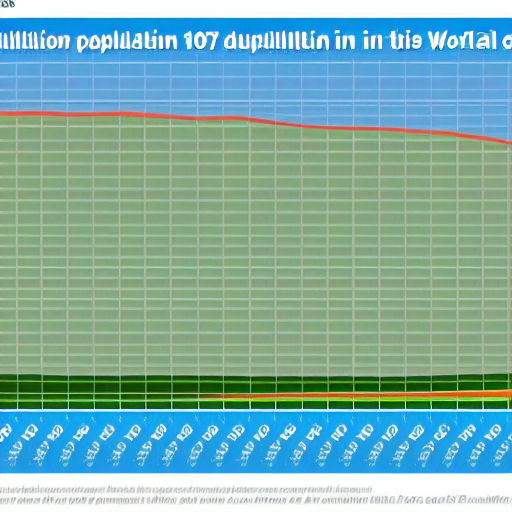

In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = 'cpu'

ALLOW_CUDA = False
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = 'mps'
print(f'Using device {DEVICE}')

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# TEXT TO IMAGE

prompt = "" # Add prompt here
uncond_prompt = "" # Can use as a negative prompt
do_cfg = True
cfg_scale = 9

## IMAGE TO IMAGE

input_image = None
image_path = "" # Add image here
if image_path:
    input_image = Image.open(image_path)
strength = 0.9

sampler = 'ddpm'
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)

Image.fromarray(output_image)